#### Intern: Anjali Bathla
Task 1

---

### 1.) Importing data

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
#importing dataset from link
url='http://bit.ly/w-data'
raw_data=pd.read_csv(url)
raw_data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
#summary of dataset
raw_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


This is a very small dataset. There are no missing values.
___

### 2.) Visualizing data

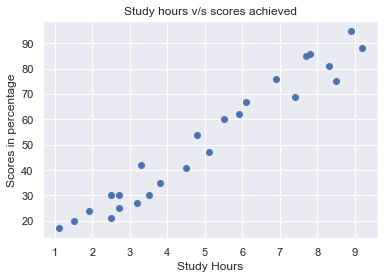

In [4]:
#scatter plot to know the relationship between target data and labelled data
plt.scatter(raw_data['Hours'],raw_data['Scores'])
plt.ylabel('Scores in percentage')
plt.xlabel('Study Hours')
plt.title('Study hours v/s scores achieved')
plt.show()

A positive linear relation can be seen in the graph.

---

### 3.) Preparing data

In [5]:
#Preparing data
X= np.array(raw_data['Hours'])
y= np.array(raw_data['Scores'])

In [6]:
X.shape

(25,)

X is 1D array. But we have to make it a 2D array to build the model using sklearn.

In [7]:
X=X.reshape(25,1)

In [8]:
X.shape

(25, 1)

In [9]:
#Splitting data into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.2 , random_state=0) 

___

### 4.) Linear Regression Model

In [10]:
#Building the model
from sklearn.linear_model import LinearRegression
LinReg= LinearRegression()

#training the model
LinReg.fit(X_train,y_train)
print("Training successful")

Training successful


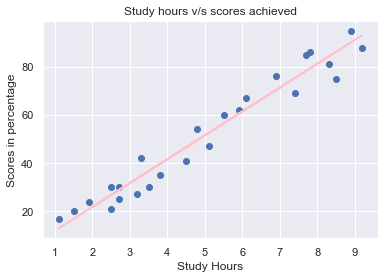

In [11]:
# Plotting the regression line
line = LinReg.coef_*X+LinReg.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line, color='pink')
plt.ylabel('Scores in percentage')
plt.xlabel('Study Hours')
plt.title('Study hours v/s scores achieved')
plt.show()

---

### 5.) Predicting scores using Model

In [12]:
#Model testing
y_pred= LinReg.predict(X_test)


In [13]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


#### Predicting score at 9.25 hours of study.

In [14]:
hour=[[9.25]]
score_1 = LinReg.predict(hour)

In [15]:
print('Actual value:', hour, '\nPredicted:', score_1)  

Actual value: [[9.25]] 
Predicted: [93.69173249]


### 6.) Evaluating the Model

In [16]:
from sklearn.metrics import mean_absolute_error  
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975


---